In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!ls files

all_annotated.tsv  temp.txt


### Text extraction

The dataset is https://www.kaggle.com/rtatman/the-umass-global-english-on-twitter-dataset  



This dataset contains 10,502 tweets, randomly sampled from all publicly available geotagged Twitter messages, annotated for being in English, non-English, or having code switching, language ambiguity or having been automatically generated. It includes messages sent from 130 different countries.


In [4]:
data_df = pd.read_csv('files/all_annotated.tsv', sep="\t")

In [5]:
data_df.head()

,Tweet ID,Country,Date,Tweet,Definitely English,Ambiguous,Definitely Not English,Code-Switched,Ambiguous due to Named Entities,Automatically Generated Tweets
0,434215992731136000,TR,2014-02-14,Bugün bulusmami lazimdiii,0,0,1,0,0,0
1,285903159434563584,TR,2013-01-01,Volkan konak adami tribe sokar yemin ederim :D,0,0,1,0,0,0
2,285948076496142336,NL,2013-01-01,Bed,1,0,0,0,0,0
3,285965965118824448,US,2013-01-01,I felt my first flash of violence at some fool...,1,0,0,0,0,0
4,286057979831275520,US,2013-01-01,Ladies drink and get in free till 10:30,1,0,0,0,0,0


### Find phone numbers

#### Using pattern matching (regular expressions), extract phone numbers from text.

In [6]:
import re
#https://stackoverflow.com/questions/3868753/find-phone-numbers-in-python-script
phone_re = re.compile(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})')
#Match the following patterns
# 000-000-0000
# 000 000 0000
# 000.000.0000

# (000)000-0000
# (000)000 0000
# (000)000.0000
# (000) 000-0000
# (000) 000 0000
# (000) 000.0000

# 000-0000
# 000 0000
# 000.0000

# 0000000
# 0000000000
# (000)0000000

In [7]:
phone_nums = []
for num_list in data_df['Tweet'].apply(lambda x: phone_re.findall(x)):
    if len(num_list) > 0:
        phone_nums += num_list
print("There are {0} phone numbers in the dataset".format(len(phone_nums)))

There are 55 phone numbers in the dataset


In [8]:
phone_nums

['0705435889',
 '888-364-1188',
 '7315216',
 '0606201',
 '256 348 1705',
 '1112131415',
 '1997082',
 '9092893',
 '267-595-1800',
 '1128070',
 '011 2012',
 '8805081',
 '0817000027',
 '1016101',
 '1937202842',
 '3786359',
 '1217655',
 '0730060',
 '1826136',
 '1844831',
 '2038988',
 '2212201',
 '(559)643-6724',
 '8394926',
 '1500005256',
 '5555555555',
 '5555555555',
 '5555555555',
 '5555555555',
 '270 9999',
 '5555555',
 '9387647447',
 '9787382',
 '8992296',
 '1500021599',
 '2014122',
 '501-9229',
 '2294330',
 '8528884180',
 '2000139445',
 '5733672240',
 '7200000',
 '1000000000',
 '015-2016',
 '5555555555',
 '5555555555',
 '5555555555',
 '5555555',
 '5295194',
 '401-2499',
 '6552956654',
 '2585250106',
 '1001720159',
 '2960108',
 '0000000']

There is a total of 55 phone numbers extracted using regex rule. Some of the extracted numbers may not be a real phone number. For example, "5555555555" in Thai means "hahahahahaha", and some can be number that represents money. This kind of patterns requires specific language knowledge to figure it all out.

### Determining the language

In [9]:
import langid 

LangID is a standalone Language Identification (LangID) tool. (https://github.com/saffsd/langid.py)

Lui, Marco and Timothy Baldwin (2011) Cross-domain Feature Selection for Language Identification, In Proceedings of the Fifth International Joint Conference on Natural Language Processing (IJCNLP 2011), Chiang Mai, Thailand, pp. 553—561. Available from http://www.aclweb.org/anthology/I11-1062

In [10]:
guessed_langs = data_df['Tweet'].apply(langid.classify)
langs = guessed_langs.apply(lambda tuple: tuple[0])
langs[:5]

0    az
1    ms
2    en
3    en
4    en
Name: Tweet, dtype: object

In [11]:
guess_en_labels = langs.apply(lambda x: 1 if x == 'en' else 0)
guess_en_labels = guess_en_labels.values

en_labels = data_df['Definitely English'].values

In [12]:
from sklearn.metrics import accuracy_score
y_pred = guess_en_labels
y_true = en_labels
print("Accuracy of guessed language using langid is {0}".format(accuracy_score(y_true, y_pred)))

Accuracy of guessed language using langid is 0.8268901161683488


In [13]:
print("Number of unique languages:")
print(len(langs.unique()))
print("")

print("Number of data in English:")
print(sum(langs=="en"))
print("")

print("Percent of data in English:")
print((sum(langs=="en")/len(langs))*100)
print("")

print("Number of data in Thai:")
print((sum(langs=="th")))
print("")

print("Percent of data in Thai:")
print((sum(langs=="th")/len(langs))*100)

Number of unique languages:
95

Number of data in English:
4302

Percent of data in English:
40.96362597600457

Number of data in Thai:
147

Percent of data in Thai:
1.399733384117311


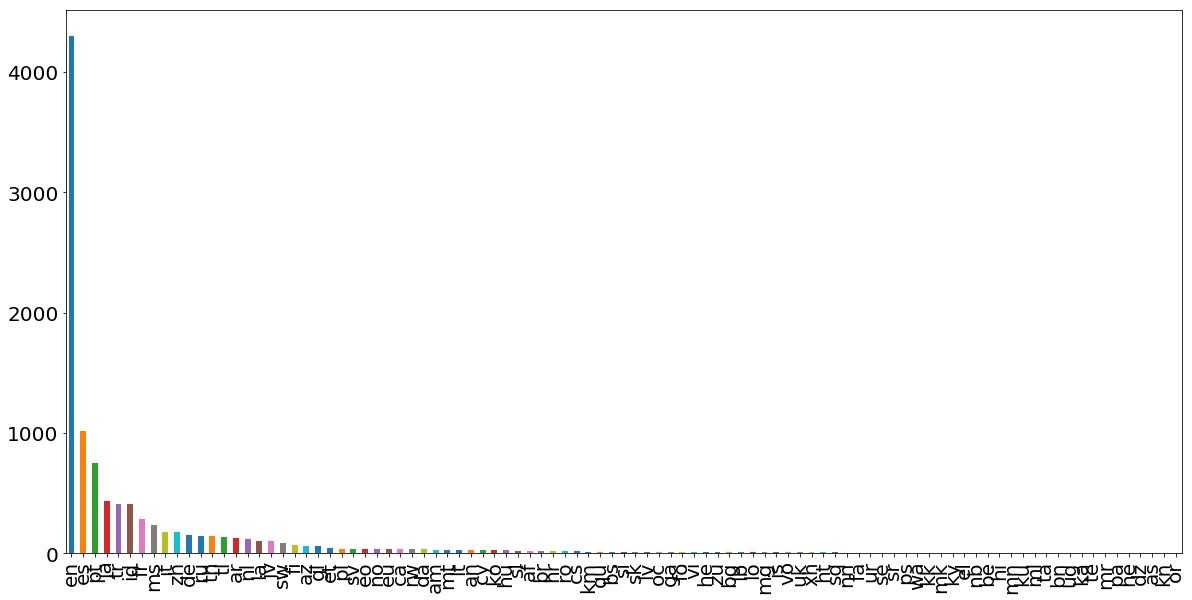

In [14]:
langs_df = pd.DataFrame(langs)
langs_count = langs_df.Tweet.value_counts()
langs_count.plot.bar(figsize=(20,10), fontsize=20)

Start from this step, we will work only with English text by using the data that have "Definitely English" column value equal to 1

In [15]:
data_eng_df = data_df[data_df["Definitely English"] == 1]

In [16]:
data_eng_df["Definitely English"].unique()

array([1])

In [17]:
data_eng_df.head(2)

,Tweet ID,Country,Date,Tweet,Definitely English,Ambiguous,Definitely Not English,Code-Switched,Ambiguous due to Named Entities,Automatically Generated Tweets
2,285948076496142336,NL,2013-01-01,Bed,1,0,0,0,0,0
3,285965965118824448,US,2013-01-01,I felt my first flash of violence at some fool...,1,0,0,0,0,0


In [18]:
print("There are {0} row left".format(len(data_eng_df)))

There are 5086 row left


### Part of speech tagging

#### Using POS tagging, print all words detected as proper nouns.

In [19]:
!python3 -m spacy download en


    Linking successful
    /usr/local/lib/python3.6/site-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [20]:
import spacy
nlp = spacy.load('en')

In [21]:
def extract_propn_token(doc):
    doc_nlp = nlp(doc)
    propn_tokens = []
    for token in doc_nlp:
        if token.pos_ == "PROPN":
            propn_tokens.append(token.text)
    return propn_tokens

In [22]:
data_eng_df.loc[:,'Tweet_propn'] = data_eng_df['Tweet'].apply(extract_propn_token)
data_eng_df.loc[:,'Tweet_propn'] = data_eng_df['Tweet_propn'].apply(lambda x: " ".join(x) if len(x) > 0 else "")

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [23]:
propn_tokens = []
for item in data_eng_df['Tweet_propn']:
    if item != '':
        propn_tokens += item.split()
print("There are {0} unique words detected as proper nouns".format(len(set(propn_tokens))))

There are 7021 unique words detected as proper nouns


In [24]:
print("All of proper nouns tokens are: \n{0}".format(propn_tokens))

All of proper nouns tokens are: 
['Miranda', '❤', 'Kohl', 'http://t.co/I8ZkQHT9', 'Wanna', '@tim_allen111', 'Tennessee', 'York', 'SexSurvey', 'Trixie', 'Tricktina', 'Vegyes', 'Élelmiszer', 'Budapest', 'http://t.co/Jjhatjt0', 'Mama', 'Little', 'Yella', 'Pils', 'Thunderdome', 'http://t.co/VEw7n9xn', 'Harrah', 'Las', 'Vegas', 'NL', "Hold'em", 'Poker', 'Tournament', 'w/', 'Bounties', 'Lololololololol', 'Haha', 'Joos', 'DLP-115', 'Feed', 'Hot', 'Veneer', 'Press', '@BigJoe2323', 'Lawwdd', 'Lmaoo.\\', 'Mockingjay', 'Sjaj', 'Slobode', 'Les', 'Mis', 'Jinki', '@Lord_Sugar', 'Stabilisers', 'Forquilhinha', 'Lukey', 'Smh', 'FUCK', 'LIAM', 'PAYNE', 'TWEET', '\\Dark\\', 'K', 'RETWEETS', 'FAVORITES', 'Flip', 'Phone', 'Shawty', 'Ughh', '@HeavyHitterz91', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'BOSE', 'STATION', 'Catfish', 'Aww', 'Bought', 'Al', 'Fakher', 'Orange', 'Grape', 'Vanilla', 'Vanilla', 'Twilight', 'Baltimore', 'CRAZY', 'Bugis', 'Beyonce', 'Haha', 'Nana', 'Diner', 'Happy', 'Birthdayyyyyyyyy

### Remove irrelevant words

#### Based on previous results, keep important words and discards those not bringing any useful information.

In [25]:
import re

# text cleaning rules are modified from https://www.kaggle.com/hubert0527/spacy-name-entity-recognition
def clean_string(text):
    SPECIAL_TOKENS = {
        'quoted': 'quoted_item',
        'non-ascii': '',#'non_ascii_word',
        'undefined': 'something'
    }
    def pad_str(s):
        return ' '+s+' '
    
    # Empty text
    
    if type(text) != str or text=='':
        return ''
    
    # preventing first and last word being ignored by regex
    # and convert first word in question to lower case
    text = ' ' + text[0].lower() + text[1:] + ' '
    
    # replace all first char after either [.!?)"'] with lowercase
    # don't mind if we lowered a proper noun, it won't be a big problem
    
    def lower_first_char(pattern):
        matched_string = pattern.group(0)
        return matched_string[:-1] + matched_string[-1].lower()
    
    text = re.sub("(?<=[\.\?\)\!\'\"])[\s]*.",lower_first_char , text)
    
    # Replace weird chars in text
    
    text = re.sub("’", "'", text) # special single quote
    text = re.sub("`", "'", text) # special single quote
    text = re.sub("“", '"', text) # special double quote
    text = re.sub("？", "?", text) 
    text = re.sub("…", " ", text) 
    text = re.sub("é", "e", text) 
    
    # Clean shorthands
    
    text = re.sub("\'s", " ", text) # we have cases like "Sam is" or "Sam's" (i.e. his) these two cases aren't separable, I choose to compromise are kill "'s" directly
    text = re.sub(" whats ", " what is ", text, flags=re.IGNORECASE)
    text = re.sub("\'ve", " have ", text)
    text = re.sub("can't", "can not", text)
    text = re.sub("n't", " not ", text)
    text = re.sub("i'm", "i am", text, flags=re.IGNORECASE)
    text = re.sub("\'re", " are ", text)
    text = re.sub("\'d", " would ", text)
    text = re.sub("\'ll", " will ", text)
    text = re.sub("e\.g\.", " eg ", text, flags=re.IGNORECASE)
    text = re.sub("b\.g\.", " bg ", text, flags=re.IGNORECASE)
    text = re.sub(r"(\W|^)([0-9]+)[kK](\W|$)", r"\1\g<2>000\3", text) # better regex provided by @armamut
    text = re.sub("e-mail", " email ", text, flags=re.IGNORECASE)
    text = re.sub("(the[\s]+|The[\s]+)?U\.S\.A\.", " America ", text, flags=re.IGNORECASE)
    text = re.sub("(the[\s]+|The[\s]+)?United State(s)?", " America ", text, flags=re.IGNORECASE)
    text = re.sub("\(s\)", " ", text, flags=re.IGNORECASE)
    text = re.sub("[c-fC-F]\:\/", " disk ", text)
    
    # replace the float numbers with a random number, it will be parsed as number afterward, and also been replaced with word "number"
    text = re.sub('[0-9]+\.[0-9]+', " 87 ", text)
    
    # remove comma between numbers, i.e. 15,000 -> 15000
    text = re.sub('(?<=[0-9])\,(?=[0-9])', "", text)

    # add padding to punctuations and special chars, we still need them later
    text = re.sub('\$', " dollar ", text)
    text = re.sub('\%', " percent ", text)
    text = re.sub('\&', " and ", text)
    
    def pad_pattern(pattern):
        matched_string = pattern.group(0)
        return pad_str(matched_string)
    text = re.sub('[\!\?\@\^\+\*\/\,\~\|\`\=\:\;\.\#\\\]', pad_pattern, text) 
        
    text = re.sub('[^\x00-\x7F]+', pad_str(SPECIAL_TOKENS['non-ascii']), text) # replace non-ascii word with special word
    
    # indian dollar
    text = re.sub("(?<=[0-9])rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(" rs(?=[0-9])", " rs ", text, flags=re.IGNORECASE)
    
    # clean text rules get from : https://www.kaggle.com/currie32/the-importance-of-cleaning-text
    
    text = re.sub(r" (the[\s]+|The[\s]+)?US(A)? ", " America ", text)
    text = re.sub(r" UK ", " England ", text, flags=re.IGNORECASE)
    text = re.sub(r" india ", " India ", text)
    text = re.sub(r" switzerland ", " Switzerland ", text)
    text = re.sub(r" china ", " China ", text)
    text = re.sub(r" chinese ", " Chinese ", text) 
    text = re.sub(r" imrovement ", " improvement ", text, flags=re.IGNORECASE)
    text = re.sub(r" intially ", " initially ", text, flags=re.IGNORECASE)
    text = re.sub(r" quora ", " Quora ", text, flags=re.IGNORECASE)
    text = re.sub(r" dms ", " direct messages ", text, flags=re.IGNORECASE)  
    text = re.sub(r" demonitization ", " demonetization ", text, flags=re.IGNORECASE) 
    text = re.sub(r" actived ", " active ", text, flags=re.IGNORECASE)
    text = re.sub(r" kms ", " kilometers ", text, flags=re.IGNORECASE)
    text = re.sub(r" cs ", " computer science ", text, flags=re.IGNORECASE) 
    text = re.sub(r" upvote", " up vote", text, flags=re.IGNORECASE)
    text = re.sub(r" iPhone ", " phone ", text, flags=re.IGNORECASE)
    text = re.sub(r" \0rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(r" calender ", " calendar ", text, flags=re.IGNORECASE)
    text = re.sub(r" ios ", " operating system ", text, flags=re.IGNORECASE)
    text = re.sub(r" gps ", " GPS ", text, flags=re.IGNORECASE)
    text = re.sub(r" gst ", " GST ", text, flags=re.IGNORECASE)
    text = re.sub(r" programing ", " programming ", text, flags=re.IGNORECASE)
    text = re.sub(r" bestfriend ", " best friend ", text, flags=re.IGNORECASE)
    text = re.sub(r" dna ", " DNA ", text, flags=re.IGNORECASE)
    text = re.sub(r" III ", " 3 ", text)
    text = re.sub(r" banglore ", " Banglore ", text, flags=re.IGNORECASE)
    text = re.sub(r" J K ", " JK ", text, flags=re.IGNORECASE)
    text = re.sub(r" J\.K\. ", " JK ", text, flags=re.IGNORECASE)
    
    # typos 
    text = re.sub(r" quikly ", " quickly ", text)
    text = re.sub(r" unseccessful ", " unsuccessful ", text)
    text = re.sub(r" demoniti[\S]+ ", " demonetization ", text, flags=re.IGNORECASE)
    text = re.sub(r" demoneti[\S]+ ", " demonetization ", text, flags=re.IGNORECASE)  
    text = re.sub(r" addmision ", " admission ", text)
    text = re.sub(r" insititute ", " institute ", text)
    text = re.sub(r" connectionn ", " connection ", text)
    text = re.sub(r" permantley ", " permanently ", text)
    text = re.sub(r" sylabus ", " syllabus ", text)
    text = re.sub(r" sequrity ", " security ", text)
    text = re.sub(r" undergraduation ", " undergraduate ", text) # not typo, but GloVe can't find it
    text = re.sub(r"(?=[a-zA-Z])ig ", "ing ", text)
    text = re.sub(r" latop", " laptop", text)
    text = re.sub(r" programmning ", " programming ", text)  
    text = re.sub(r" begineer ", " beginner ", text)  
    text = re.sub(r" qoura ", " Quora ", text)
    text = re.sub(r" wtiter ", " writer ", text)  
    text = re.sub(r" litrate ", " literate ", text)  
    
    #custom
    text = re.sub(r" https ", " http ", text)  
    text = re.sub(r'(.)\1{2,}', r'\1', text) # buuuuuttttt -> but
      
    # for words like A-B-C-D or "A B C D", 
    # if A,B,C,D individuaally has vector in glove:
    #     it can be treat as separate words
    # else:
    #     replace it as a special word, A_B_C_D is enough, we'll deal with that word later
    #
    # Testcase: 'a 3-year-old 4 -tier car'
    
    def dash_dealer(pattern):
        matched_string = pattern.group(0)
        splited = matched_string.split('-')
        splited = [sp.strip() for sp in splited if sp!=' ' and sp!='']
        joined = ' '.join(splited)
        parsed = nlp(joined)
        for token in parsed:
            # if one of the token is not common word, then join the word into one single word
            if not token.has_vector or token.text in SPECIAL_TOKENS.values():
                return '_'.join(splited)
        # if all tokens are common words, then split them
        return joined

    text = re.sub("[a-zA-Z0-9\-]*-[a-zA-Z0-9\-]*", dash_dealer, text)
    
    # try to see if sentence between quotes is meaningful
    # rule:
    #     if exist at least one word is "not number" and "length longer than 2" and "it can be identified by SpaCy":
    #         then consider the string is meaningful
    #     else:
    #         replace the string with a special word, i.e. quoted_item
    # Testcase:
    # i am a good (programmer)      -> i am a good programmer
    # i am a good (programmererer)  -> i am a good quoted_item
    # i am "i am a"                 -> i am quoted_item
    # i am "i am a programmer"      -> i am i am a programmer
    # i am "i am a programmererer"  -> i am quoted_item
    
    def quoted_string_parser(pattern):
        string = pattern.group(0)
        parsed = nlp(string[1:-1])
        is_meaningful = False
        for token in parsed:
            # if one of the token is meaningful, we'll consider the full string is meaningful
            if len(token.text)>2 and not token.text.isdigit() and token.has_vector:
                is_meaningful = True
            elif token.text in SPECIAL_TOKENS.values():
                is_meaningful = True
            
        if is_meaningful:
            return string
        else:
            return pad_str(string[0]) + SPECIAL_TOKENS['quoted'] + pad_str(string[-1])

    text = re.sub('\".*\"', quoted_string_parser, text)
    text = re.sub("\'.*\'", quoted_string_parser, text)
    text = re.sub("\(.*\)", quoted_string_parser, text)
    text = re.sub("\[.*\]", quoted_string_parser, text)
    text = re.sub("\{.*\}", quoted_string_parser, text)
    text = re.sub("\<.*\>", quoted_string_parser, text)

    text = re.sub('[\(\)\[\]\{\}\<\>\'\"]', pad_pattern, text) 
    
    # the single 's' in this stage is 99% of not clean text, just kill it
    text = re.sub(' s ', " ", text)
    
    # reduce extra spaces into single spaces
    text = re.sub('[\s]+', " ", text)
    text = text.strip()
    
    return text

In [26]:
def filter_stopword(doc):
    doc_nlp = nlp(doc)
    results = []
    for token in doc_nlp:
        if not token.is_stop: # not stop word
            results.append(token.text)
    return " ".join(results)

In [27]:
data_eng_df.loc[:,'Tweet_propn_clean'] = data_eng_df["Tweet_propn"].apply(clean_string)
data_eng_df.loc[:,'Tweet_propn_clean'] = data_eng_df["Tweet_propn_clean"].apply(filter_stopword)

In [28]:
data_eng_df.tail()

,Tweet ID,Country,Date,Tweet,Definitely English,Ambiguous,Definitely Not English,Code-Switched,Ambiguous due to Named Entities,Automatically Generated Tweets,Tweet_propn,Tweet_propn_clean
10493,774721885049323520,US,2016-09-10,"I'm at Hempstead Hair World in Elmont, NY http...",1,0,0,0,0,1,Hempstead Hair World Elmont NY,hempstead Hair World Elmont NY
10494,774775165473488898,US,2016-09-11,Bachelorette 💍💞 @ Laurita Winery https://t.co/...,1,0,0,0,0,0,Bachelorette 💍 💞 Laurita Winery https://t.co/B...,bachelorette Laurita Winery http : / / t . co ...
10495,774787685340868608,PH,2016-09-11,When life gives you Lemon 🍋\nREAD 🤓🤓🤓👌👌👌☝️☝\n-...,1,0,0,0,0,0,Lemon 🍋 \nREAD 🤓 🤓 \n Solutions,lemon \ nREAD \ n Solutions
10496,774940630824816646,US,2016-09-11,This #job might be a great fit for you: Sr. In...,1,0,0,0,0,1,Sr Information Architect Supervisor https://t....,sr Information Architect Supervisor http : / /...
10497,774941788247298050,TR,2016-09-11,"I'm at @PiazzaAvym in Canik, Samsun w/ @mertar...",1,0,0,0,0,1,Canik Samsun w/ @mertarmann,canik Samsun w / @ mertarmann


In this steps, the text messages are processed by corrent some typos, removing special characters and removing stopwords

### Shrink the vector space

#### Using Stemming and Lemmatization, make the space of words smaller.

Lemmatization using spaCy to grouping together the inflected forms of a word so they can be analysed as a single item

In [29]:
def lemmatizer(doc):        
    sent = []
    doc_nlp = nlp(doc)
    for token in doc_nlp:
        sent.append(token.lemma_)
    return " ".join(sent)

In [30]:
data_eng_df.loc[:,'Tweet_propn_clean_lemma'] = data_eng_df["Tweet_propn_clean"].apply(lemmatizer)

In [31]:
cleaned_data_eng_df = data_eng_df[data_eng_df['Tweet_propn_clean_lemma'] != ""]

In [32]:
cleaned_data_eng_df.head()

,Tweet ID,Country,Date,Tweet,Definitely English,Ambiguous,Definitely Not English,Code-Switched,Ambiguous due to Named Entities,Automatically Generated Tweets,Tweet_propn,Tweet_propn_clean,Tweet_propn_clean_lemma
7,286216100784521216,GB,2013-01-01,Watching #Miranda On bbc1!!! @mermhart u r HIL...,1,0,0,0,0,0,Miranda ❤,miranda,miranda
9,286282349925257216,US,2013-01-02,Shopping! (@ Kohl's) http://t.co/I8ZkQHT9,1,0,0,0,0,0,Kohl http://t.co/I8ZkQHT9,kohl http : / / t . co / I8ZkQHT9,kohl http : / / t . co / i8zkqht9
24,286958983368036352,US,2013-01-03,@Taybaybay_19 cool... Wanna see when u get it!,1,0,0,0,0,0,Wanna,wanna,wanna
27,287056970421268480,US,2013-01-04,@Opucar91 @tim_allen111 I'm in Tennessee.. Onl...,1,0,0,0,0,0,@tim_allen111 Tennessee,@ tim_allen1 Tennessee,@ tim_allen1 tennessee
36,287551697151205376,CA,2013-01-05,Rain bitches but get my dick on with at least...,1,0,0,0,0,0,York,york,york


In [33]:
propn_clean_lemma_tokens = []
for item in cleaned_data_eng_df['Tweet_propn_clean_lemma']:
    if item != '':
        propn_clean_lemma_tokens += item.split()
print("There are {0} remaining unique words after lemmatization process".format(len(set(propn_clean_lemma_tokens))))

There are 6545 remaining unique words after lemmatization process


### Cluster documents into logical groups

#### Transform the cleaned text documents into numerical vectors 
#### Reduce dimensionality 
####  Apply Clustering algorithm to group the documents.
####  Visualizing the results

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
cleaned_texts = cleaned_data_eng_df['Tweet_propn_clean_lemma'].values


tfidf_vectorizer = TfidfVectorizer(
    min_df=1, max_features=None, strip_accents='unicode', lowercase=True,
    analyzer='word', ngram_range=(1, 1), use_idf=True, 
    smooth_idf=True, sublinear_tf=True
)

tfidf_vectorizer.fit(cleaned_texts)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [36]:
cleaned_texts_tfidf = tfidf_vectorizer.transform(cleaned_texts)

In [37]:
vocab_frame = pd.DataFrame({'words': list(tfidf_vectorizer.vocabulary_.keys())}, index = tfidf_vectorizer.vocabulary_.keys())
vocab_frame.head()

,words
miranda,miranda
kohl,kohl
http,http
co,co
i8zkqht9,i8zkqht9


In [38]:
print("Number of vocabulary of tfidf_vectorizer is {0} words".format(len(tfidf_vectorizer.vocabulary_)))

Number of vocabulary of tfidf_vectorizer is 6499 words


#### k-means Clustering

In [39]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

In [40]:
# number of clusters
n_clusters = 5

# fit k-mean clustering
kmeans = KMeans(n_clusters=n_clusters, random_state = 0)

kmeans.fit_predict(cleaned_texts_tfidf)

array([3, 2, 3, ..., 3, 2, 3], dtype=int32)

In [41]:
clusters = kmeans.labels_.tolist()
cleaned_data_eng_df.loc[:, 'clusters'] = clusters

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [42]:
cleaned_data_eng_df['clusters'].value_counts() 

3    2390
2     633
0      93
4      23
1      21
Name: clusters, dtype: int64

In [43]:
cleaned_data_eng_df.head()

,Tweet ID,Country,Date,Tweet,Definitely English,Ambiguous,Definitely Not English,Code-Switched,Ambiguous due to Named Entities,Automatically Generated Tweets,Tweet_propn,Tweet_propn_clean,Tweet_propn_clean_lemma,clusters
7,286216100784521216,GB,2013-01-01,Watching #Miranda On bbc1!!! @mermhart u r HIL...,1,0,0,0,0,0,Miranda ❤,miranda,miranda,3
9,286282349925257216,US,2013-01-02,Shopping! (@ Kohl's) http://t.co/I8ZkQHT9,1,0,0,0,0,0,Kohl http://t.co/I8ZkQHT9,kohl http : / / t . co / I8ZkQHT9,kohl http : / / t . co / i8zkqht9,2
24,286958983368036352,US,2013-01-03,@Taybaybay_19 cool... Wanna see when u get it!,1,0,0,0,0,0,Wanna,wanna,wanna,3
27,287056970421268480,US,2013-01-04,@Opucar91 @tim_allen111 I'm in Tennessee.. Onl...,1,0,0,0,0,0,@tim_allen111 Tennessee,@ tim_allen1 Tennessee,@ tim_allen1 tennessee,3
36,287551697151205376,CA,2013-01-05,Rain bitches but get my dick on with at least...,1,0,0,0,0,0,York,york,york,3


In [44]:
cleaned_data_eng_df.index = cleaned_data_eng_df.clusters.values

In [45]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1] 

for i in range(n_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :15]: # n words per cluster
        print(' %s' % vocab_frame.loc[tfidf_vectorizer.get_feature_names()[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print("\n")
    
    print("Cluster %d Country:" % i, end='')
    for country in cleaned_data_eng_df.loc[i]['Country'].unique():
        print(' %s,' % country, end='')
    print("\n")
    
    print("Cluster %d Automatically Generated Tweets:" % i, end='')
    for country in cleaned_data_eng_df.loc[i]['Automatically Generated Tweets'].unique():
        print(' %s,' % country, end='')
    print("\n")
    
    print("\n\n=========")
print("\n\n")

Top terms per cluster:

Cluster 0 words: b'rkiye', b'stanbul', b'cafe', b'ankara', b'niversitesi', b'zmir', b'avm', b'sahili', b'adana', b'bornova', b'istanbul', b'meydan', b'rk', b'trabzon', b'gaziemir',

Cluster 0 Country: TR,

Cluster 0 Automatically Generated Tweets: 1, 0,



Cluster 1 words: b'rt', b'mastermind', b'ak', b'21lmxtadqn', b'hh5aoubshc', b'seapen', b'http', b'co', b'lol', b'nidalif', b'istarafm', b'puterin', b'help', b'gohbsfgb5i', b'schleep',

Cluster 1 Country: ID, US, IE, KE, BR,

Cluster 1 Automatically Generated Tweets: 0,



Cluster 2 words: b'co', b'http', b'job', b'careerarc', b'hospitality', b'jobs', b'city', b'manager', b'ca', b'cafe', b'university', b'il', b'america', b'pic', b'retail',

Cluster 2 Country: US, HU, BR, MY, PT, RU, TR, ES, nan, CL, ID, FR, MX, NL, GB, DE, LK, PH, IT, CA, TH, PE, SG, AR, CR, JP, KW, IN, CZ, AU, ZA, GH, CH, RS, KE, CO, NZ, EC, MO, NG, PA, IL, UA, BG, RO, GR, SA, BE, PK, BY, CN, SE,

Cluster 2 Automatically Generated Tweets: 0, 1

#### Multidimensional scaling

convert the dist matrix into a 2-dimensional array

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(cleaned_texts_tfidf)

In [48]:
from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print("\n\n")

Visualizing document clusters

In [49]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'rkiye, stanbul, cafe', 
                 1: 'rt, mastermind, ak', 
                 2: 'co, http, job', 
                 3: 'job, careerarc, sta', 
                 4: 'kuala, lumpur, wp'}

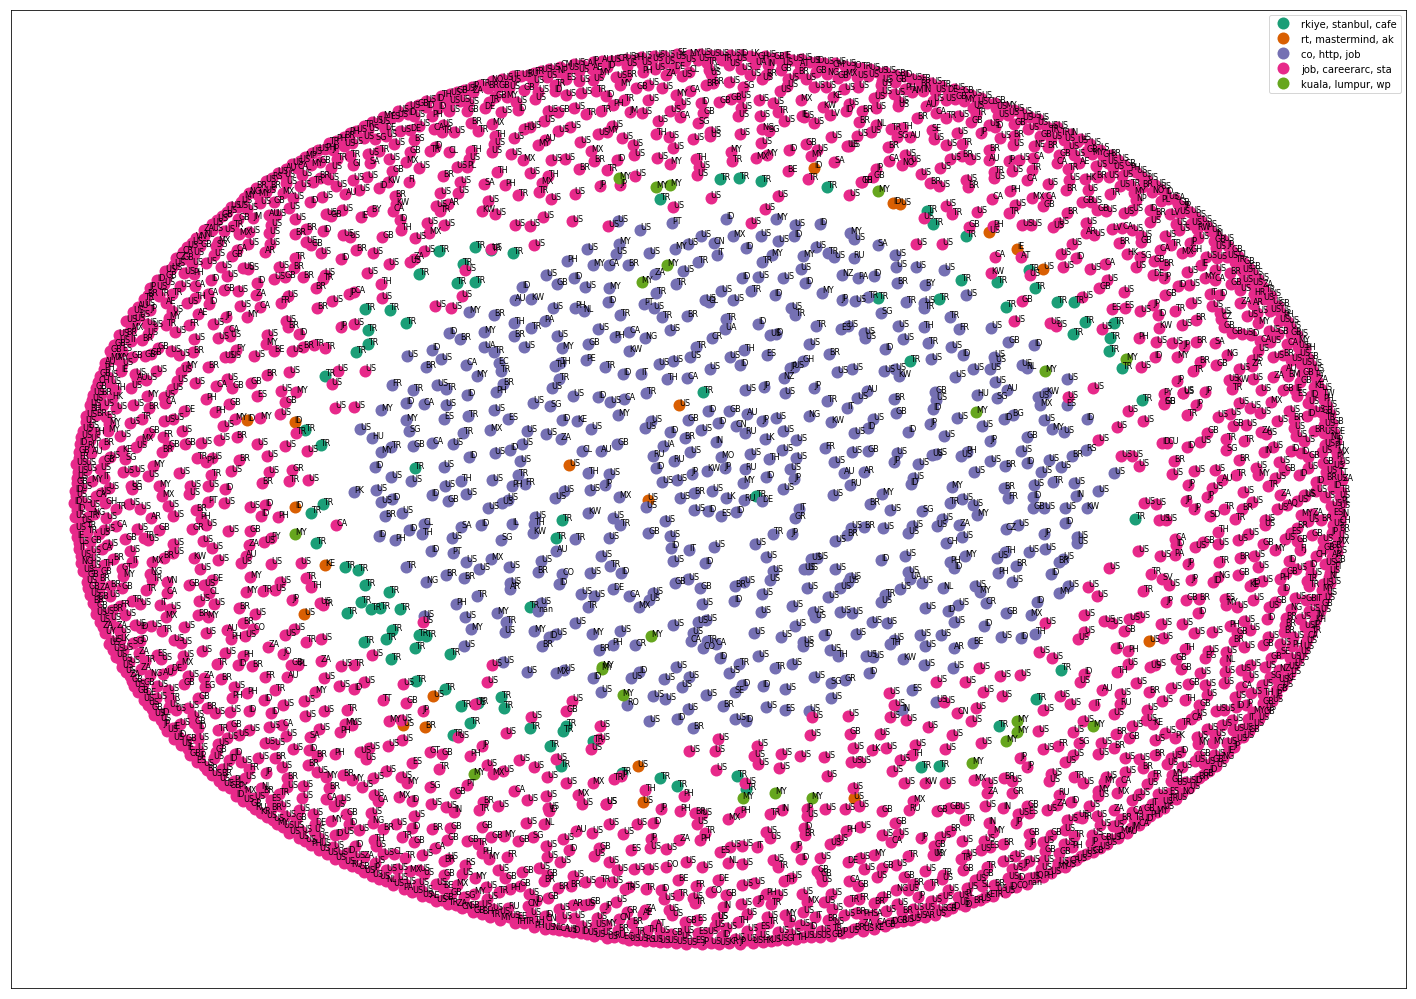

In [53]:
#create data frame that has the result of the MDS plus the cluster numbers and country
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, country=cleaned_data_eng_df['Country'].values)) 

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(25, 18)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['country'], size=8)  

plt.savefig('files/clusters_english.png', dpi=100)
plt.show() #show the plot

### Summary

This dataset contains 10,502 tweets, randomly sampled from all publicly available geotagged Twitter messages. There is a total of 55 phone numbers extracted using regex rule. Some of the extracted numbers may not be a real phone number. For example, "5555555555" in Thai means "hahahahahaha", and some can be number that represents money. This kind of patterns requires specific language knowledge to figure it all out.

After cleaning the texts and filtering out unused words, the text messages are converted to Tf-idf vector then do clustering using k-means with number of cluster equal to 5.


According to the top terms per k-means cluster, 

There are 93 messages in Cluster 0 represent twitter messages from Turkey

There are 21 messages in Cluster 1 represent retweet messages

There are 2633 messages in Cluster 2 represent the concept of 'co', 'http', 'job', 'careerarc', 'hospitality'

There are 2390 messages in Cluster 3 represent the concept of 'job', 'careerarc', 'sta', 'retail', 'friday', 'god'

There are 23 messages in Cluster 4 represent messages from Malaysia

